# **1. Necessary Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.model_selection import  GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# **2.  DATASET:**

The dataset is "wine.csv" Using chemical analysis determine the origin of wines and is taken from UCI Machine Learning Repositary. 
* **Number of Instances:** 1599
* **Number of Attributes:** 12

**Loading Dataset from csv file**

In [ ]:
cell_df = pd.read_csv('/content/sample_data/wine.csv')

In [ ]:
cell_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
cell_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
cell_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


In [ ]:
(cell_df.groupby('quality')).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
bad,744,744,744,744,744,744,744,744,744,744,744
good,855,855,855,855,855,855,855,855,855,855,855


In [ ]:
features_df = cell_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

X = np.asarray(features_df)    

y = np.asarray(cell_df['quality']) 

X[0:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [ ]:
y[0:5]

array(['bad', 'bad', 'bad', 'good', 'bad'], dtype=object)

# **3. Spliting the dataset into train data:test data::80:20**

In [ ]:
from sklearn.model_selection import train_test_split
from tabulate import tabulate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

table = [["X_train",X_train.shape[0],X_train.shape[1]],["X_test",X_test.shape[0],X_test.shape[1]],
         ["y_train",y_train.shape[0],1],["y_test",y_test.shape[0],1]]



| Dataset       | \# of rows     | \# of attributes     |
| :------------- | :----------: | :-----------: |
|  X_train | 1279  | 11    |
|  X_test | 320   | 11 |
|  y_train | 1279   | 1    |
|  y_test   | 320 | 1 |

In [ ]:
X, y = cell_df[list(cell_df.columns[:-1])], cell_df[list(cell_df.columns[-1:])]
print(X.shape, y.shape)

(1599, 11) (1599, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279, 1)
(320, 1)


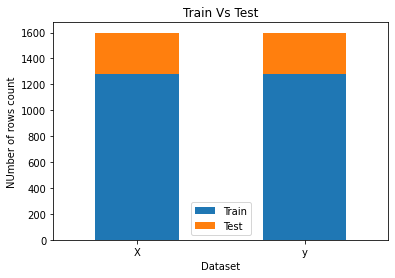

In [ ]:
data_temp = {"Train":[X_train.shape[0], y_train.shape[0]],
        "Test":[X_test.shape[0], y_test.shape[0]]
        };
index     = ["X", "y"];
split_df = pd.DataFrame(data=data_temp, index=index);
split_df.plot.bar(stacked=True, rot=0, title="Train Vs Test");
plt.xlabel("Dataset")
plt.ylabel("NUmber of rows count")
plt.show();


# **4. Use 10-fold cross validation and tabulate the results**

KFold divides all the samples in groups of samples, called folds  of equal sizes . The prediction function is learned using folds, and the fold left out is used for test.
Here, I have used 10-Fold CV (n_splits=10), where the data will be split into 10 folds. Here printing out the indexes of the training and the testing sets in each iteration to clearly see the process of K-Fold CV where the training and testing set changes in each iteration.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score


In [ ]:
X = cell_df.iloc[:,:-1]
y = cell_df.iloc[:,-1]

In [ ]:
k = 10
cv = KFold(n_splits=10, shuffle=False)
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)

**K- fold cross algorithm and SVM classification model**

In [ ]:
acc_score = []
itr = k
for train_index , test_index in cv.split(X):
    
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    classifier.fit(X_train,y_train)
    pred_values = classifier.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    print('Accuracy of {}th fold = {}%'.format((k-itr+1),np.round(acc*100, 2)))
    itr-=1

avg_acc_score = sum(acc_score)/k

print('\nTraining dataset length for each fold = {}'.format(len(train_index)))
print('\nTesting dataset length for each fold = {}'.format(len(test_index)))
print('\nMean accuracy of all {} folds = {}%'.format(k, np.round(avg_acc_score*100,2)))

Accuracy of 1th fold = 68.75%
Accuracy of 2th fold = 71.88%
Accuracy of 3th fold = 75.0%
Accuracy of 4th fold = 67.5%
Accuracy of 5th fold = 69.38%
Accuracy of 6th fold = 78.75%
Accuracy of 7th fold = 78.12%
Accuracy of 8th fold = 80.62%
Accuracy of 9th fold = 78.12%
Accuracy of 10th fold = 71.7%

Training dataset length for each fold = 1440

Testing dataset length for each fold = 159

Mean accuracy of all 10 folds = 73.98%


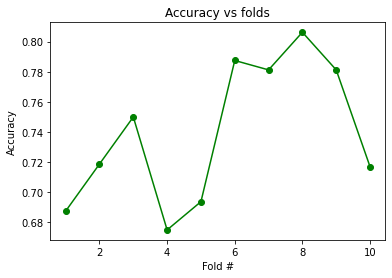

In [ ]:
plt.plot(np.arange(1,k+1), acc_score, marker='o', linestyle='solid', color = 'green')
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

**K- fold cross algorithm and Random Forest classification model**

In [ ]:
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
k = 10
c_v = KFold(n_splits=10, shuffle=False)
model = RandomForestClassifier(n_estimators=20, max_depth=10)

In [ ]:
acc_score = []
itr = k
for train_index , test_index in c_v.split(X):
    
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    print('Accuracy of {}th fold = {}%'.format((k-itr+1),np.round(acc*100, 2)))
    itr-=1

avg_acc_score = sum(acc_score)/k

print('\nTraining dataset length for each fold = {}'.format(len(train_index)))
print('\nTesting dataset length for each fold = {}'.format(len(test_index)))
print('\nMean accuracy of all {} folds = {}%'.format(k, np.round(avg_acc_score*100,2)))

Accuracy of 1th fold = 70.62%
Accuracy of 2th fold = 72.5%
Accuracy of 3th fold = 72.5%
Accuracy of 4th fold = 75.62%
Accuracy of 5th fold = 74.38%
Accuracy of 6th fold = 73.75%
Accuracy of 7th fold = 78.12%
Accuracy of 8th fold = 78.75%
Accuracy of 9th fold = 73.75%
Accuracy of 10th fold = 70.44%

Training dataset length for each fold = 1440

Testing dataset length for each fold = 159

Mean accuracy of all 10 folds = 74.04%


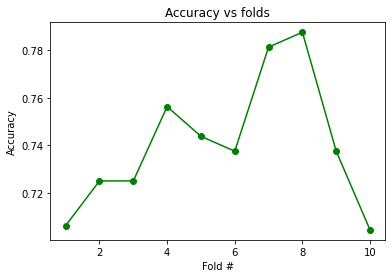

In [ ]:
plt.plot(np.arange(1,k+1), acc_score, marker='o', linestyle='solid', color = 'green')
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

# **5. Change the hyperparameter of SVM and random forest and plot the accuracy**

**Support Vector Classification**

**C** is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

 **Gamma**: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

In [ ]:
classifier = svm.SVC(kernel='linear', gamma='scale', C=10)

clf = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print('Accuracy of Linear SVC on training set: {:.2f}%'.format(clf.score(X_train, y_train)*100))
print('Accuracy of Linear SVC on test set: {:.2f}%'.format(clf.score(X_test, y_test)*100))


Accuracy of Linear SVC on training set: 75.28%
Accuracy of Linear SVC on test set: 71.07%


In [ ]:

param_grid = {'C': [0.1, 1, 10, 100]}

grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
#grid = GridSearchCV(clf,param_grid,refit=True)
temp_grid = grid.fit(X_train, y_train)
best_C = grid.best_params_['C']# **5. Change the hyperparameter of SVM and random forest and plot the accuracy**
print("The best value of hyper-parameter C : {:.3f}" .format(best_C))
print( "Best estimator accuracy on test set {:.3f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best value of hyper-parameter C : 1.000
Best estimator accuracy on test set 70.440 


In [ ]:
clf = SVC(kernel ='linear', gamma='scale', C=best_C).fit(X_train,y_train)

Confusion Matrix [[51 23]
 [23 62]]


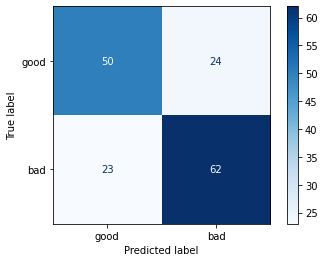

In [ ]:
target_names = ["good", "bad"]
cm = confusion_matrix(y_test,classifier.predict(X_test))
print("Confusion Matrix",cm)
vis = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels = target_names)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         bad       0.69      0.69      0.69        74
        good       0.73      0.73      0.73        85

    accuracy                           0.71       159
   macro avg       0.71      0.71      0.71       159
weighted avg       0.71      0.71      0.71       159



**Random Forest Classifier**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. I have started with **n_estimator=20** to see how our algorithm performs. 

In [ ]:
model = RandomForestClassifier(n_estimators=20, max_depth=15)
z = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)
ac = accuracy_score(y_test, y_pred)

print('Accuracy is: ',ac*100)


Accuracy is:  78.4375


Confusion Matrix [[51 23]
 [23 62]]


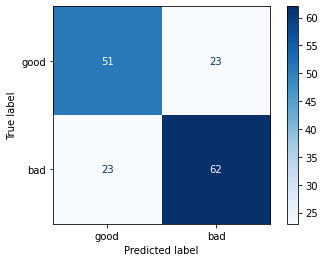

In [ ]:
target_names = ["good", "bad"]
cm = confusion_matrix(y_test,classifier.predict(X_test))
print("Confusion Matrix",cm)
vis = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels = target_names)
#sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%")
plt.show()